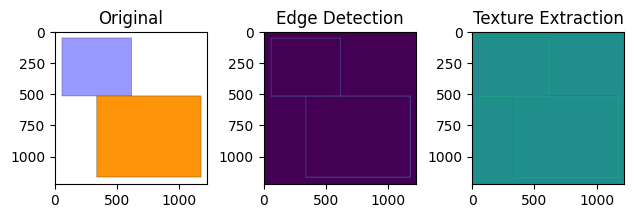

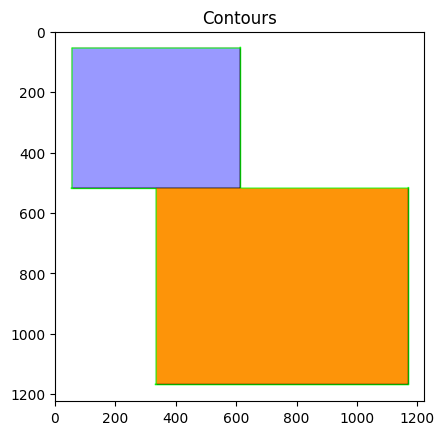

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('rect.png')
image_mat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

edges_x = cv2.filter2D(gray_image, -1, sobel_x)
edges_y = cv2.filter2D(gray_image, -1, sobel_y)
edges = cv2.addWeighted(edges_x, 0.5, edges_y, 0.5, 0)

sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
texture = sobelx + sobely

l_title = ["Original", "Edge Detection", "Texture Extraction"]
l_var = [image_mat, edges, texture]

fig, axs = plt.subplots(1, 3)
fig.tight_layout(pad=1.0)
for i in range(3):
    axs[i].imshow(l_var[i])
    axs[i].set_title(l_title[i])
    
plt.show()

### Given by ma'am
### This section requires an extra window which is not available automatically hence you can use the code below
# contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
# cv2.imshow("Contours", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image_mat.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours using matplotlib
plt.imshow(contour_image)
plt.title("Contours")
plt.show()

Number of Contours found = 1


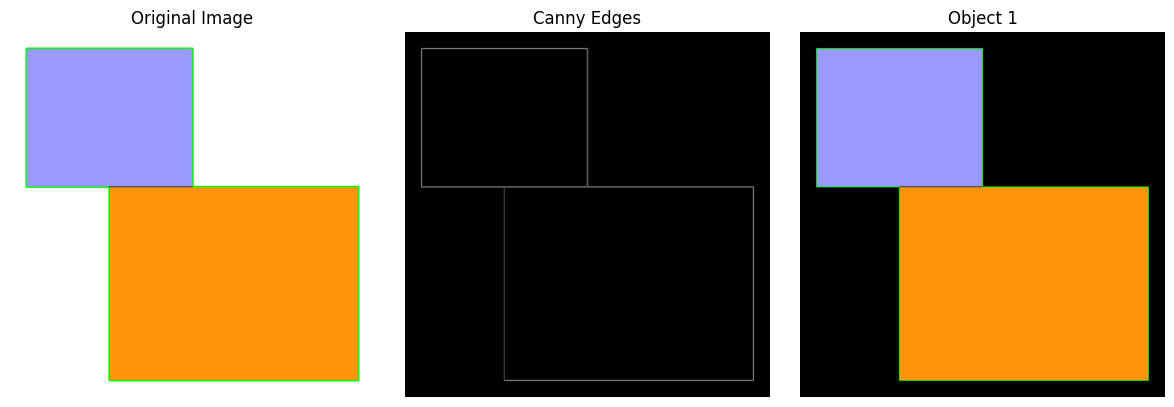

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('rect.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edged = cv2.Canny(gray, 30, 200)

# Finding Contours
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours found = " + str(len(contours)))

# Draw all contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# Create a list to store cropped images of each object
cropped_images = []

# Iterate through contours
for i, contour in enumerate(contours):
    # Create a mask image for each contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [contour], 0, 255, -1)
    # Extract the object using the mask
    
    object_extracted = np.zeros_like(image)
    object_extracted[mask == 255] = image[mask == 255]
    # Convert BGR to RGB for displaying with Matplotlib
    object_extracted_rgb = cv2.cvtColor(object_extracted, cv2.COLOR_BGR2RGB)
    # Append the extracted object to the list
    cropped_images.append(object_extracted_rgb)
    
fig, axs = plt.subplots(1, len(cropped_images)+2, figsize=(12, 4))

# Plot the original image
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(edged, cmap='gray')
axs[1].set_title('Canny Edges')
axs[1].axis('off')

for i in range(len(cropped_images)):
    axs[i+2].imshow(cropped_images[i])
    axs[i+2].set_title(f'Object {i+1}')
    axs[i+2].axis('off')

plt.tight_layout()
plt.show()